<a href="https://colab.research.google.com/github/campusplage/compte-rendus-bobo_florian__seck_omar/blob/master/TP2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.
  __La procédure à suivre sera la même pour tous les TP. Sa mise en œuvre correspond au quart de la note.__

## b. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## a. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
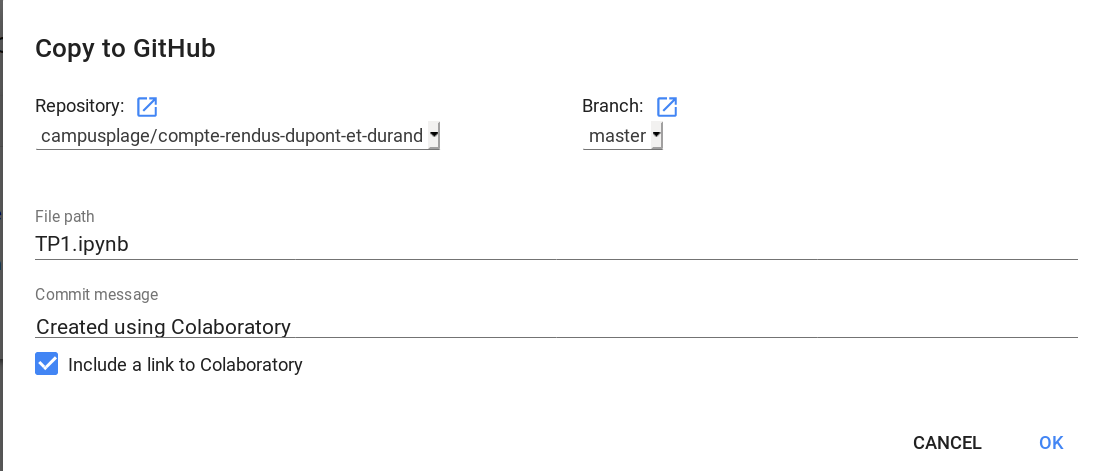

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 1. Charger et manipuler des données LFW (3 points)

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [1]:
# différents imports utiles par la suite
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [2]:
# listez les clés de la variable `d` 
d.keys()
...

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [3]:
# Votre travail ici 
for i in d.keys(): 
 print(f'le type de {i} est {type(d[i])}') #f-string  pour afficher la classe de chaque clefs du dictionnaire 
...

le type de data est <class 'numpy.ndarray'>
le type de images est <class 'numpy.ndarray'>
le type de target est <class 'numpy.ndarray'>
le type de target_names est <class 'numpy.ndarray'>
le type de DESCR est <class 'str'>


Ellipsis

Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [4]:
# Affichez la dimension de d.images (utilisez la propriété `shape` des `ndarrays`)
d.images.shape
...

# (comme on le voit, c'est un tableau 3D.)

(1560, 50, 37)

In [0]:
# créez les variables nb_samples, height et width correspondantes
# (indice: testez d'abord `a, b, c = [1, 2, 3] )
samples, height, width = d.images.shape    #unpacking du tuple contenant le nombrs d'images, leurs hauteurs et leurs largeurs .

Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [6]:
# chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
# correspondante dans `d.images`. 
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
# (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
# et la méthode `flatten` qui applatie un `ndarray`)


# en fait, on aurait pu construire cette version applatie très simplement, avec 
# la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [7]:
# Pour extraire les 10 premières images, il suffit de faire:
d.data[:10]

# Pour extraire les pixels 50...99 des 10 premières images:
d.data[:10, 50:100]
# Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
# 
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [8]:
# Première solution: commentez chaque ligne

#
for index in range(10):
  #
  print(d.target_names[d.target[index]])

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [9]:
# Deuxième solution: supprimez la boucle, et affichez ces 10 premières `target` directement
# (indice: utilisez [] deux fois, de manière imbriquée)
print(d.target_names[d.target[0:10]])
...

['Tony Blair' 'Gerhard Schroeder' 'Donald Rumsfeld' 'George W Bush'
 'George W Bush' 'Colin Powell' 'Ariel Sharon' 'George W Bush'
 'Colin Powell' 'George W Bush']


## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [0]:
#fonction utilitaire pour réorganiser aléatoirement des images
def shuffle(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# définition d'une fonction d'affichage
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

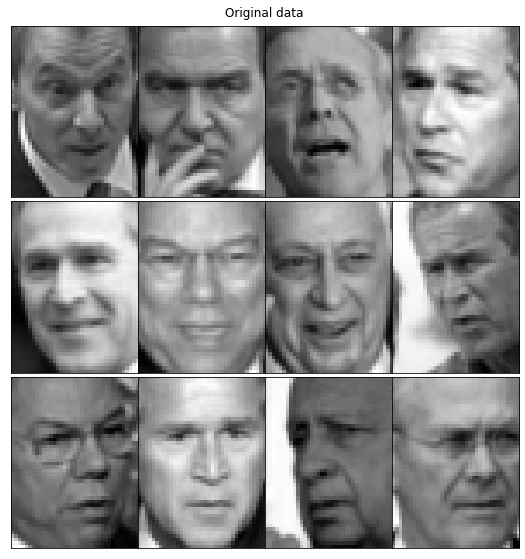

In [11]:
# Affichons les premières images
plot_images(d.data, 'Original data')

In [12]:
# commentez
for (i, name) in enumerate(d.target_names):
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))

target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


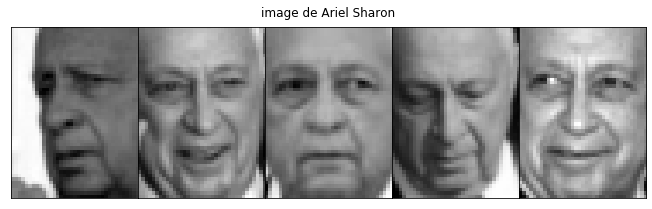

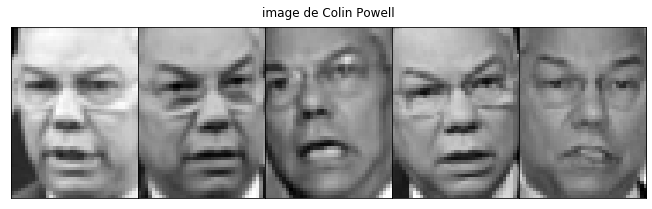

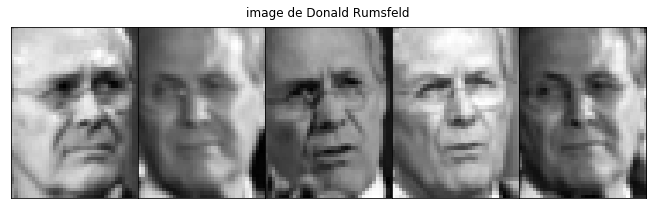

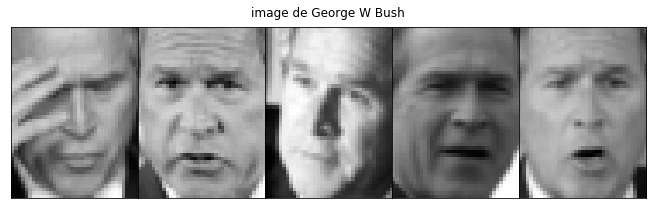

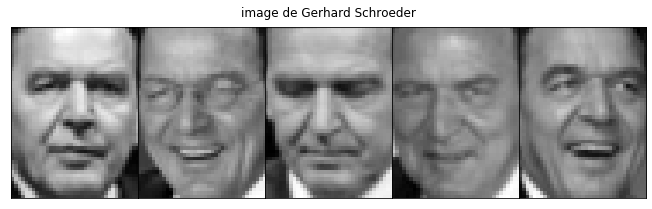

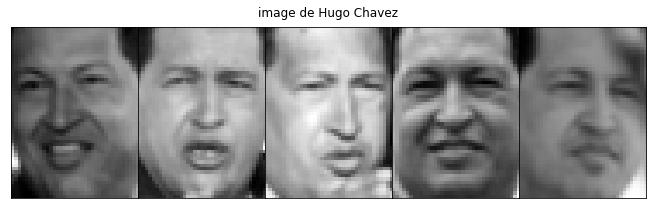

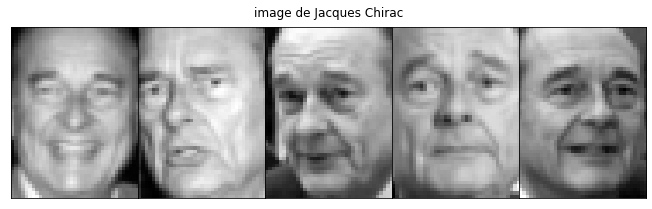

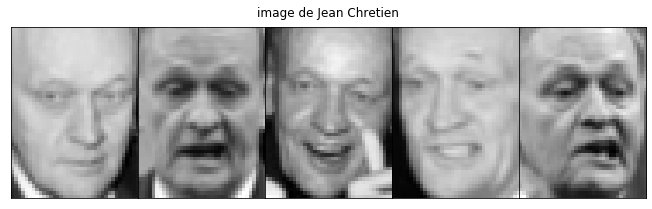

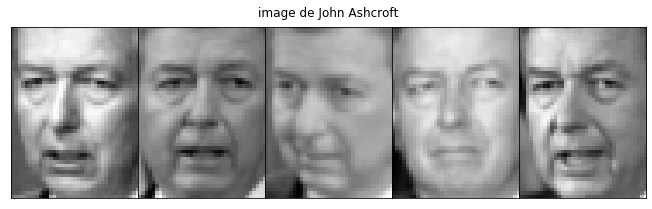

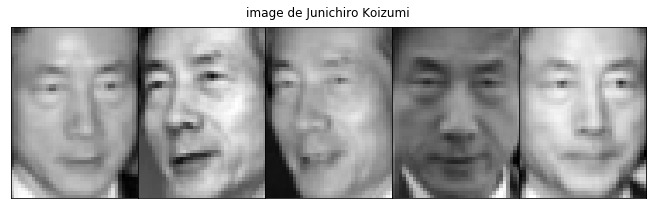

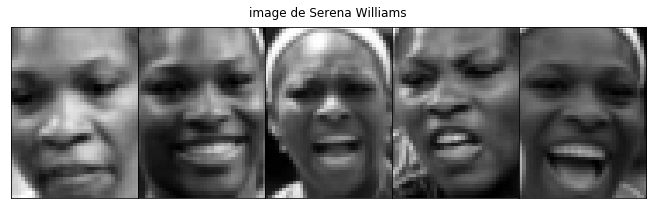

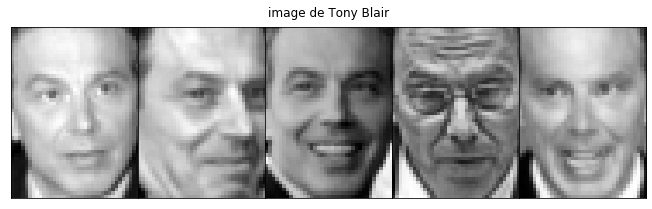

In [13]:
# Corsons un peu le problème:
# Pour chaque personnalité, affichez 5 photos de la base prises au hasard 
def data_index_persona(x,name): 
  ''' via un dictionnaire lfw et le nom on récupère l'indices correspondant aux données imagés.''' 
  for j in range(len(x.target_names==name)) : 
    if (x.target_names==name)[j]==True :
      return j  


def data_persona(x,name,index=False): 
  ''' On récèpère toute les données imagés associés à une personnalité ''' 
  if index==True:
    return x.target==data_index_persona(x,name) 
  else :
    return x.data[d.target==data_index_persona(x,name)] 
  

import random 
for i in d.target_names:
  k = random.sample(range(len(data_persona(d,i))),10)
  plot_images(data_persona(d,i)[k],f'image de {i}',n_col=5, n_row=1)  
  #On crée une boucle pour afficher pour chaque personnalité présente dans le dataset un set de 5 images différentes.

# Exploitation simple d'une ACP (5 points)

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [0]:
# Créez l'objet pca, et entrainez le sur les données...
from sklearn.decomposition import PCA  
#On choisit n composantes : 
n_composante = 300
acp=PCA(n_components=n_composante)
acp.fit(d.data) # On applique l'ACP à notre jeu de donnée
# Calculez la transformée des images par ACP
data_acp=acp.transform(d.data)  # On calcule la transformé des images par l'ACP précédement faite .

# calculez la reconstruction correspondante
rebuild_data=acp.inverse_transform(data_acp) # On applique la transformation inverse de l'ACP 

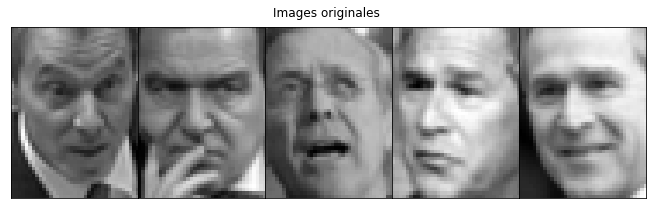

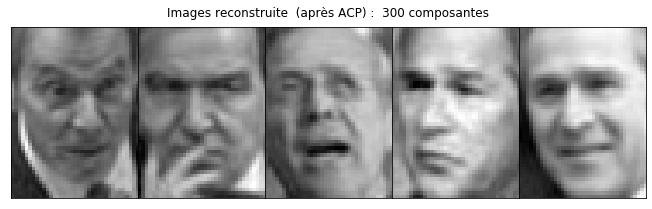

In [15]:
# Affichez sur une ligne les 5 premières images originales
plot_images(d.data ,title ='Images originales ', n_col=5 , n_row=1)  # On affiche les images originales
# Affichez sur une ligne leur reconstruction, en indiquant le nombre de composantes dans le titre
plot_images(rebuild_data,title=f'Images reconstruite  (après ACP) :  {n_composante} composantes' ,n_col=5 , n_row=1) # On affiche les images reconstruites

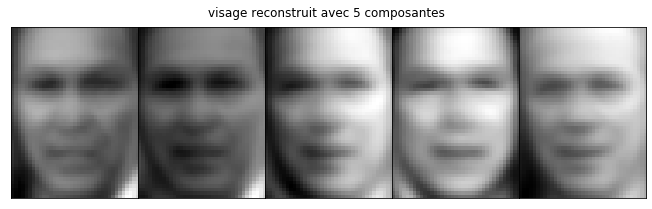

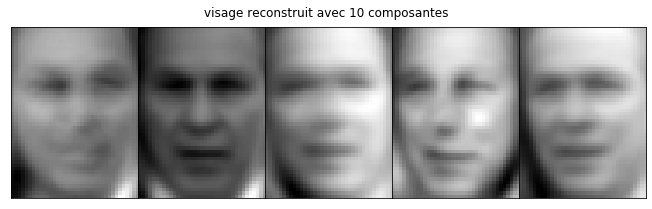

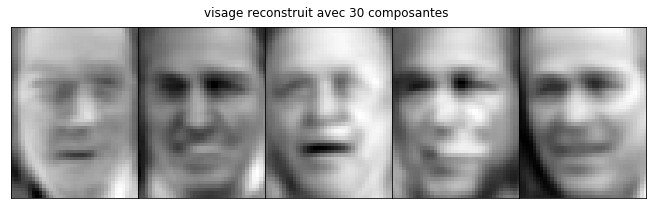

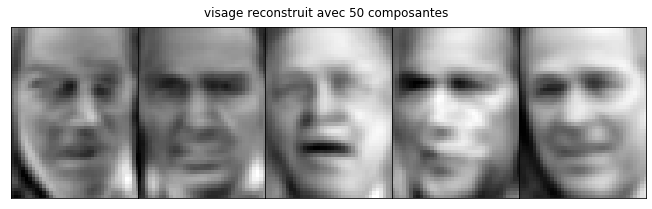

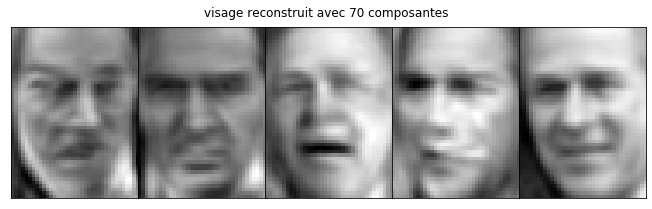

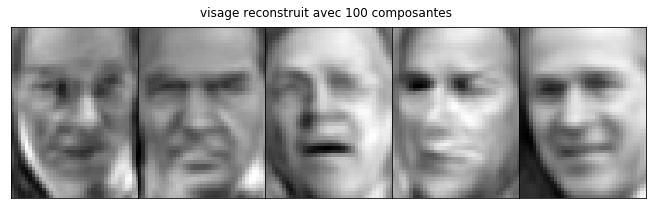

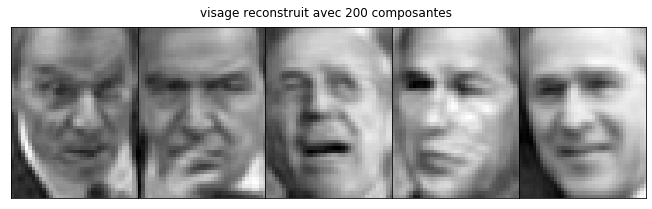

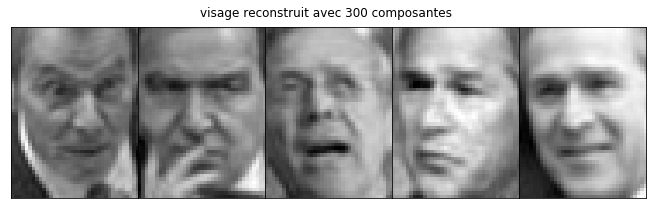

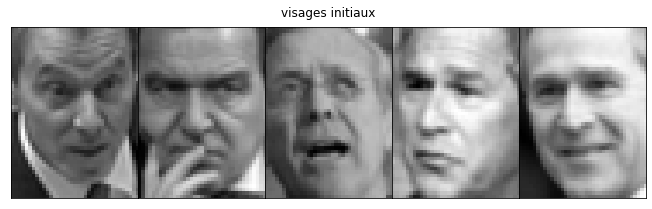

In [16]:
# Maintenant, pour les nombres de composantes suivants: 5, 10, 30, 50, 70, 100, 200, affichez les visages reconstruits sur une ligne
# puis les visages initiaux sur une ligne.
# Indice: vous avez deux options: réapprendre une ACP à chaque fois, ou bien réutiliser la même plusieurs fois.
pca = PCA(n_components=n_composante) # On fait une ACP avec 'n_componsante' composante
pca.fit(d.data) # on applique l'acp au jeu de données 
transform_data=pca.transform(d.data)  # on exprime le jeu de données selon les composantes créées .
def full_inv(transform_data,ncomp,n_composante) :  
  ''' On récupère la matrice transformé par acp et on comble les dimensions manquantes en remplissant des colonnes par des vecteurs de 0 pour que la composante ne s'exprime 
  pas dans l'inversion de l'ACP. On récupère une matrice qui va pouvoir subir la transformation inverse de l'ACP à 'n_composantes' composantes  avec seulement 
   'ncomp' composantes ''' 
  return np.append(transform_data[:,0:ncomp],
                   [[0 for __ in range(n_composante-ncomp)]for _ in range(transform_data.shape[0])],
                   axis=1)

for ncomp in [5, 10, 30, 50, 70, 100, 200,300]:  # On lance dans une boucle un plot qui va afficher à chaque itération 5 images exprimé sur 'nomp' composantes
  toinv=full_inv(transform_data,ncomp,n_composante) # On applique la fonction full_inv définit précédement 
  plot_images(pca.inverse_transform(toinv),title=f'visage reconstruit avec {ncomp} composantes ' ,n_col=5,n_row=1) #On affiche les 5 images 

# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row=1, n_col=5)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

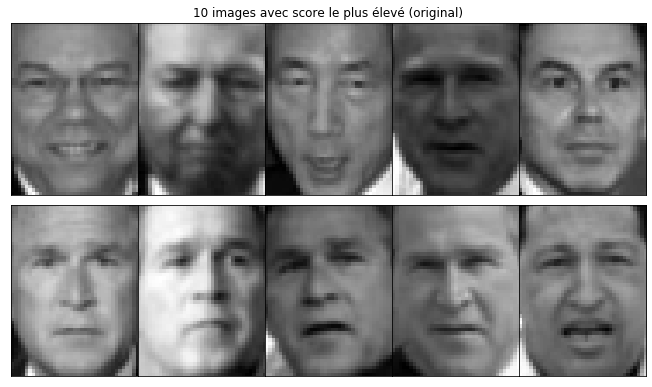

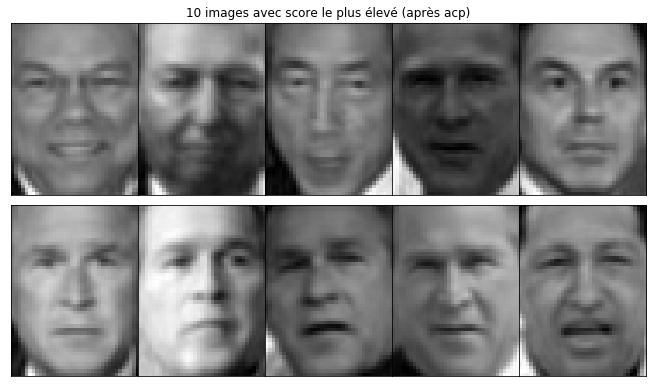

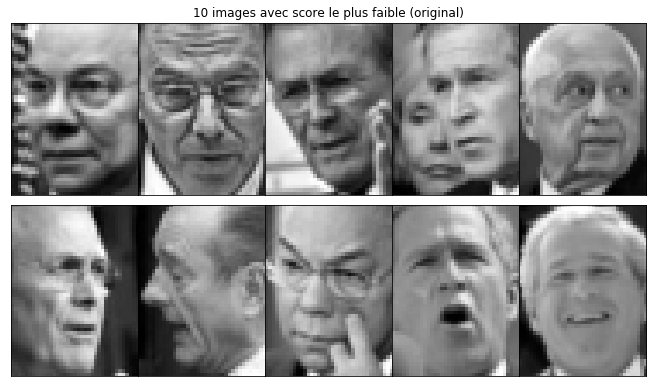

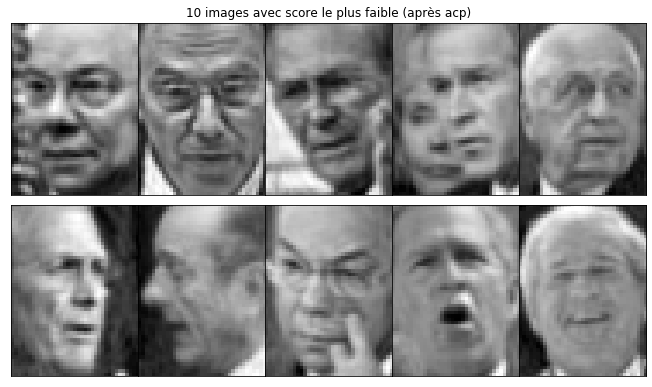

In [17]:
# extraction et tri des scores 
# Si on tri sans pré-traitement avant on va perdre l'ordre des éléments on va du coup utiliser argsort de numpy pour récupérer les index dans l'ordre croissant
reshape= pca.inverse_transform(transform_data) # On récupère la matrice transformé et on fait la transformation inverse 
Score_ACP=pca.score_samples(d.data) # On calcule le score de chaque éléments  
idx_score = np.argsort(Score_ACP) # On récupère l'indice du score par ordre croissant.
# Affichage les 10 images avec le score le plus faible, et celles avec le score le plus élevé
plot_images(d.data[idx_score[-10:]],title='10 images avec score le plus élevé (original)' ,n_col=5 , n_row=2 )
plot_images(reshape[idx_score[-10:]],title='10 images avec score le plus élevé (après acp)' ,n_col=5 , n_row=2 )
plot_images(d.data[idx_score[:10]],title='10 images avec score le plus faible (original)', n_col=5 , n_row=2 )
plot_images(reshape[idx_score[:10]],title='10 images avec score le plus faible (après acp)', n_col=5 , n_row=2 )

*__Interprétation__*  
...Il est clair que les images avec le plus haut score sont celles qui représentent le plus un visage avec un alignement des yeux et un centrage du visage autour du nez ainsi qu'une expression neutre.
 Les images avec le score le plus bas sont souvent des images qui ne sont pas de face , ou avec un visage supplémentaire , des lunettes un peu basse sur le nez, une expression particulière du visage .
 

## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

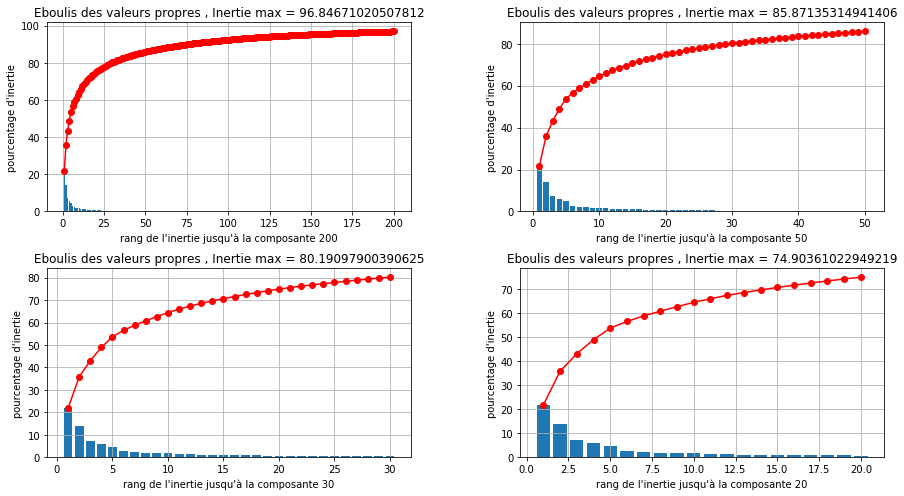

In [18]:
import matplotlib as mtp 
#J'utilise la variable d'environnement figure.figsize pour définir la taille du graphique et pour définir grid à True  
mtp.rcParams['figure.figsize']=(15,8) 
plt.rcParams['axes.grid'] = True
def eboulis_plot(pca,show_viz): 
 
  ''' affichage de l'ébouli des valeurs propres pour appliquer la méthode du coude afin de récupérer un nombre de composantes avec le plus de variance expliqué .'''
  Inertie= pca.explained_variance_ratio_*100 # On récupère la variance expliqué en pourcentage
  show=(len(Inertie)-show_viz) # On définit la variable show pour récupérer le nombre d'élément dont on veut interprêter l'inertie 
  plt.bar(np.arange(len(Inertie)-show)+1, Inertie[:-show]) # On affiche sous forme de barplot l'inertie 
  plt.plot(np.arange(len(Inertie)-show)+1, Inertie[:-show].cumsum(),c="red",marker='o') # On affiche la variance expliqué totale des éléments cumulés 
  plt.xlabel(f"rang de l'inertie jusqu'à la composante {show_viz}")
  plt.ylabel("pourcentage d'inertie")
  plt.title(f"Eboulis des valeurs propres , Inertie max = {max(Inertie[:show_viz].cumsum())}")
 
#Affichage de pca.explained_variance_ratio_, ainsi que de pca.explained_variance_ratio_.cumsum()  
# On va pas à pas définir le nombre de composante qu'on va garder en affichant succintement l'éboulis des valeurs propres pour 'm' composantes 
for j,m in enumerate( [200,50,30,20],1):   # Je créer une boucle pour afficher les graphiques 
  plt.subplot(2, 2, j)  # Je les mets sous forme de sous graphique ordonné dans une grille 
  eboulis_plot(pca,m)   # Je lance la création du graphique 
plt.subplots_adjust(wspace=0.3 ,hspace=0.3)  # J'ajuste le graphique pour des questions de lisibilité 

plt.show()  # J'affiche la grille de graphique créée 




__De quoi s'agit-il ?__  
La courbe représente l'inertie ( variance expliquée cumulé par la composante )  jusqu'à la n_ème composante et le barplot 
nous montre la variance expliquée  de chaques composantes.

__Interprétez__  
On peut voir sur l'éboulis des valeurs propres qu'un "coude" se forme à peu près à partir de la 25ème composante, puis en regardant de plus près, on peut voir qu'avec 30 composante on a une variance totale expliqué  de 80% ( ce qui est non négligeable) .  Ceci dit on peut voir précédèment qu'avec moins de 20 composantes , l'image reconstruite est très 'bruité' , au final avec 200 composantes on a une reconstruction de l'image plutôt fidèle, on pourrait se contenter de 200 composantes ( quasiment 97% d'inertie ). Ce qui est déjà remarquable, on passe de plus de 1800 variables explicatives à 200 variables (avec 97% du modèle expliqué à travers les composantes )




### `pca.components_`

In [19]:
# Commencez par en affichez la dimension

# Cela devrait vous rappeler quelque chose. Affichez.
pca.components_.shape 

(300, 1850)

__De quoi s'agit-il ?__  
...

__Interprétez__  
...

# Analyses des précipitations en France (7 points)

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [20]:
# imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')

# On créer une liste des mois 
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
# on créer une autre liste pour 
types = ['Précipitations', 'Jours de pluie']

# On crée un indexage multiples pour avoir les précipitations et les jours de pluis dans un multi indexage différent sur les colonnes
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])

# On récupère les colonnes des mois pour les précipitations et les Jours de pluies .
nested_columns = list(range(12)) + list(range(13, 25))

# on crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,nested_columns].to_numpy(), columns=index)
# On récupère les données correspondants aux précipitations et aux jours de pluies 
# On réindexe la nouvelle dataframe par rapport aux index de lignes de raw_data 
data = data.set_index(raw_data.index)

# On va rajouter les autres colonnes qui ne dépendant pas des index de colonnes .
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns] 
data.head()

Grandeur  Précipitations                ... Latitude Longitude Géographie
Mois             Janvier Février  Mars  ...                              
Ville                                   ...                              
Ajaccio             78.0    69.0  51.0  ...    41.55      8.44        Sud
Angers              65.0    50.0  60.0  ...    47.28     -0.33      Ouest
Angoulème           79.0    68.0  64.0  ...    45.39      0.09      Ouest
Besançon            94.0    87.0  75.0  ...    47.15      6.02        Est
Biarritz           128.0   105.0  98.0  ...    43.29     -1.34      Ouest

[5 rows x 30 columns]

## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 

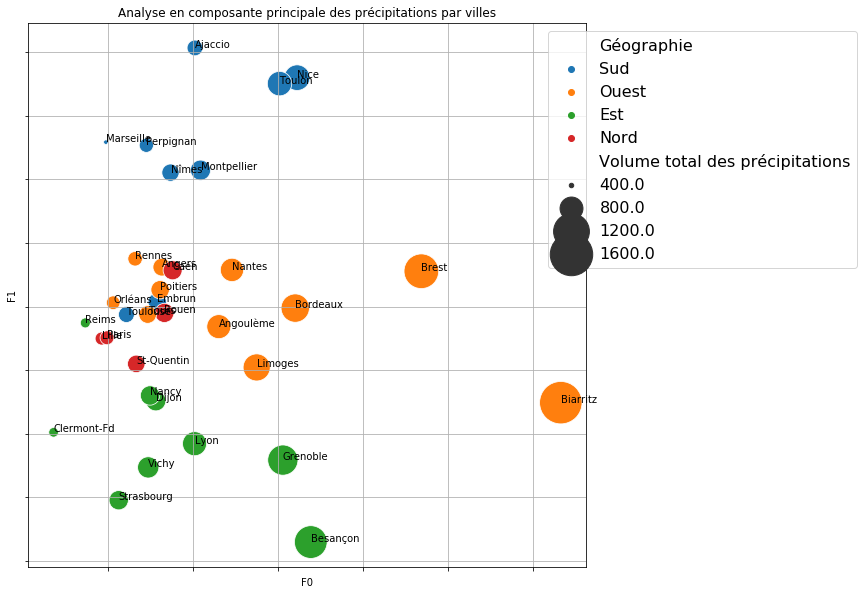

In [34]:
# ACP des précipitations par ville
data_precipitation=data['Précipitations'] # On récupère les précipitations 
V_total = data_precipitation.sum(axis=1).values # On récupère le volume total des précipitations  
Geo =data['Géographie'].values # On récupère les zones géographiques
pca_precip=PCA(n_components=2)  # On fait une acp avec 2 composantes 
precip_transform=pca_precip.fit_transform(data_precipitation)  # On transforme par ACP notre jeu de données 
precip_transform = pandas.DataFrame(precip_transform , index=data_precipitation.index ,columns=['F0','F1'])  # On crée la dataframe des précipitations 
precip_transform['Géographie']=Geo  # On rajoute la géographie 
precip_transform['Volume total des précipitations']=V_total # On rajoute le volume total des précipitations 
precip_transform['index_']=precip_transform.index


mtp.rcParams["figure.figsize"] = "30, 30" 


import seaborn as sns 
#Le code suivant est tiré du cours sur les analyse en composante principale disponible sur 
# https://github.com/campusplage/multidim/blob/master/colabs/2_Utilisation_ACP.ipynb
#On affiche un scatterplot de la première composante en fonction de la seconde , en paramétrisant : 
  # la taille = volume des précipitations 
  # code couleurs = région 
g = sns.scatterplot(x='F0',
                y='F1',
                size='Volume total des précipitations',
                sizes=(20,1800),
                data=precip_transform,
                hue='Géographie')

# on agrandit la figure
g.figure.set_size_inches(10,10)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(precip_transform.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(precip_transform.index[i], (text_x,text_y)))
# On annote la figure avec le nom des villes 

## on supprime les informations sur les axes, on rajout un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale des précipitations par villes');
plt.gca().legend(prop={'size': 16}, bbox_to_anchor=(1.5, 1.0)); # On paramètrise la taille  et la position de la boite contenant les légendes 






In [0]:
# On peut voir sur le graphique ci dessus que l'analyse en composante reflète plus ou moins la répartition géographique des villes avec quelques élements seulement
# dont la projection n'est pas fidèle à la répartition géographique . Mais on peut conclure que pour une analyse en seulement 2 composante les résultats sont intéressant, 
# il serait également intéressant d'avoir une vision plus fidèle en gardant 3 composante et en faisant une visualisation en 3 dimensions par exemple , pour voir si 3 composantes
# pourrait mieux expliquer le modèle.

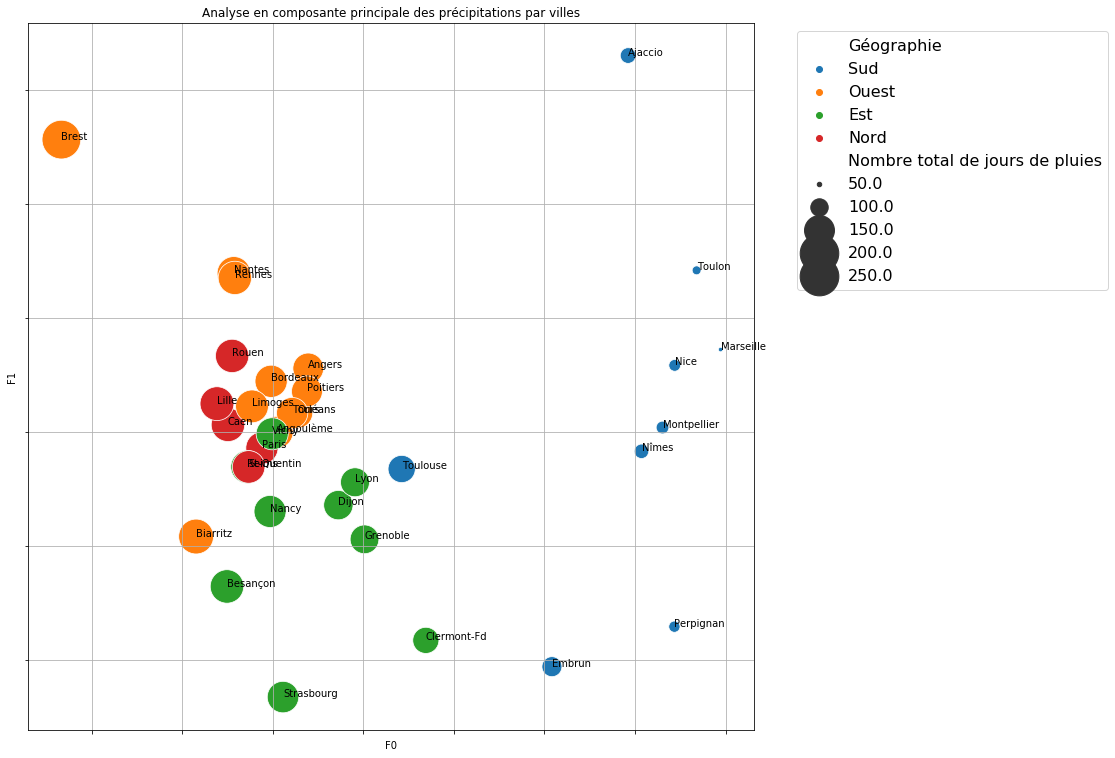

In [41]:
# ACP du nombre de jours de pluie par mois 

# ACP des précipitations par ville
data_pluie=data['Jours de pluie'] # On récupère les précipitations 
J_total = data_pluie.sum(axis=1).values # On récupère le nombre total de jours de pluies 
Geo =data['Géographie'].values # On récupère les zones géographiques
pca_jours=PCA(n_components=2)  # On fait une acp avec 2 composantes 
pluie_transform=pca_jours.fit_transform(data_pluie)  # On transforme par ACP notre jeu de données 
pluie_transform = pandas.DataFrame(pluie_transform , index=data_pluie.index ,columns=['F0','F1'])  # On crée la dataframe des jours de pluie 
pluie_transform['Géographie']=Geo  # On rajoute la géographie 
pluie_transform['Nombre total de jours de pluies']=J_total # On rajoute le volume total des précipitations 
pluie_transform['index_']=pluie_transform.index


mtp.rcParams["figure.figsize"] = "30, 30" 


import seaborn as sns 
#Le code suivant est tiré du cours sur les analyse en composante principale disponible sur 
# https://github.com/campusplage/multidim/blob/master/colabs/2_Utilisation_ACP.ipynb
#On affiche un scatterplot de la première composante en fonction de la seconde , en paramétrisant : 
  # la taille = nombre de jours de pluie par an
  # code couleurs = région 
g = sns.scatterplot(x='F0',
                y='F1',
                size='Nombre total de jours de pluies',
                sizes=(20,1500),
                data=pluie_transform,
                hue='Géographie')

# on agrandit la figure
g.figure.set_size_inches(13,13)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(pluie_transform.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(pluie_transform.index[i], (text_x,text_y)))
# On annote la figure avec le nom des villes 

## on supprime les informations sur les axes, on rajout un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale des précipitations par villes');
plt.gca().legend(prop={'size': 16}, bbox_to_anchor=(1.5, 1.0)); # On paramètrise la taille  et la position de la boite contenant les légendes 








